# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [86]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns
import os
# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

619


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
b_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
n_cities=len(cities)

cty = []
lt = [] 
lg = []
max_t = []
hum = []
cloud = []
wind_S = []
country = []
dte = []
for index, city in enumerate(cities):
    try:
        url=f"{b_url}&appid={weather_api_key}&units={units}&q={city}"
        data= requests.get(url).json() 
        cty.append(data['name'])
        lt.append(data['coord']['lat'])
        lg.append(data['coord']['lon'])
        max_t.append(data['main']['temp_max'])
        hum.append(data['main']['humidity'])
        cloud.append(data['clouds']['all'])
        wind_S.append(data['wind']['speed'])
        country.append(data['sys']['country'])
        dte.append(data['dt'])
        
        print(f"Procesing recrd {index+1} of {n_cities} | {data['name']}")
    except:
        print(f"city not found. skipping")


Procesing recrd 1 of 596 | Cape Town
Procesing recrd 2 of 596 | Vanavara
Procesing recrd 3 of 596 | Marrakesh
city not found. skipping
Procesing recrd 5 of 596 | Mataura
Procesing recrd 6 of 596 | Tasiilaq
Procesing recrd 7 of 596 | Norman Wells
city not found. skipping
Procesing recrd 9 of 596 | Nikolskoye
Procesing recrd 10 of 596 | Rikitea
Procesing recrd 11 of 596 | Wooster
Procesing recrd 12 of 596 | Thompson
Procesing recrd 13 of 596 | Tuktoyaktuk
Procesing recrd 14 of 596 | Rakiv Lis
Procesing recrd 15 of 596 | Kavaratti
city not found. skipping
Procesing recrd 17 of 596 | Port Alfred
Procesing recrd 18 of 596 | Tessalit
Procesing recrd 19 of 596 | Pisco
city not found. skipping
Procesing recrd 21 of 596 | Saint George
Procesing recrd 22 of 596 | George Town
Procesing recrd 23 of 596 | Abonnema
Procesing recrd 24 of 596 | Yenagoa
Procesing recrd 25 of 596 | Bluff
Procesing recrd 26 of 596 | Atasū
Procesing recrd 27 of 596 | Albany
Procesing recrd 28 of 596 | Dandong
Procesing re

city not found. skipping
Procesing recrd 223 of 596 | Banyo
Procesing recrd 224 of 596 | Rockport
Procesing recrd 225 of 596 | Pevek
Procesing recrd 226 of 596 | Krutinka
Procesing recrd 227 of 596 | Geraldton
city not found. skipping
Procesing recrd 229 of 596 | ‘Ewa Beach
Procesing recrd 230 of 596 | Torbay
Procesing recrd 231 of 596 | Acaraú
Procesing recrd 232 of 596 | Linxia Chengguanzhen
Procesing recrd 233 of 596 | Tura
Procesing recrd 234 of 596 | Dingle
Procesing recrd 235 of 596 | Faanui
city not found. skipping
Procesing recrd 237 of 596 | Margate
Procesing recrd 238 of 596 | Broken Hill
Procesing recrd 239 of 596 | Lompoc
Procesing recrd 240 of 596 | Oranjemund
Procesing recrd 241 of 596 | Solnechnyy
Procesing recrd 242 of 596 | Verkhoyansk
Procesing recrd 243 of 596 | Srednekolymsk
Procesing recrd 244 of 596 | Pindiga
Procesing recrd 245 of 596 | Qaqortoq
Procesing recrd 246 of 596 | Pryazha
Procesing recrd 247 of 596 | Kaabong
Procesing recrd 248 of 596 | Kodinsk
Procesin

Procesing recrd 445 of 596 | Cherskiy
Procesing recrd 446 of 596 | Mīzan Teferī
Procesing recrd 447 of 596 | Kharp
Procesing recrd 448 of 596 | Makarov
Procesing recrd 449 of 596 | Hargeisa
city not found. skipping
Procesing recrd 451 of 596 | Creel
Procesing recrd 452 of 596 | Olyka
Procesing recrd 453 of 596 | Grand-Lahou
Procesing recrd 454 of 596 | Humboldt
Procesing recrd 455 of 596 | Azare
Procesing recrd 456 of 596 | Hasaki
Procesing recrd 457 of 596 | Longyearbyen
Procesing recrd 458 of 596 | Gemeente Wageningen
Procesing recrd 459 of 596 | Batagay-Alyta
Procesing recrd 460 of 596 | Juneau
Procesing recrd 461 of 596 | Caxito
Procesing recrd 462 of 596 | Aldan
Procesing recrd 463 of 596 | Sicamous
Procesing recrd 464 of 596 | Shingū
Procesing recrd 465 of 596 | Aripuanã
Procesing recrd 466 of 596 | Along
Procesing recrd 467 of 596 | La Ronge
Procesing recrd 468 of 596 | Zhaotong
Procesing recrd 469 of 596 | Itaituba
Procesing recrd 470 of 596 | Boden
Procesing recrd 471 of 596 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
cityWeather=pd.DataFrame({'City':cty})
cw={'City': cty,
    'Lat': lt,
    'Lng': lg,
    'Max Temp': max_t,
    'Humidity': hum,
    'Cloudiness': cloud,
    'Wind Speed': wind_S,
    'Country': country,
    'Date':  dte}      
cityWeather_df=pd.DataFrame(cw)
cityWeather_df.to_csv(output_data_file,index=False)
cityWeather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,66.99,88,0,3.44,ZA,1613192304
1,Vanavara,60.3400,102.2797,-10.95,87,100,3.65,RU,1613192304
2,Marrakesh,31.6315,-8.0083,51.80,82,0,3.44,MA,1613192304
3,Mataura,-46.1927,168.8643,66.99,71,31,4.00,NZ,1613192305
4,Tasiilaq,65.6145,-37.6368,32.00,64,90,41.43,GL,1613192305
...,...,...,...,...,...,...,...,...,...
539,San Cristobal,7.7669,-72.2250,66.42,72,96,1.21,VE,1613192504
540,Aleppo Governorate,36.2500,37.5000,49.71,88,26,9.42,SY,1613192504
541,Inhambane,-23.8650,35.3833,78.80,89,75,9.22,MZ,1613192504
542,Krasnosel'kup,65.7000,82.4667,-31.97,82,6,4.65,RU,1613192504


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [87]:
#checking if there are values of humidity > 100
# result:there are no values of hummidity over 100
cw_df= pd.read_csv(output_data_file) 
cw_df['Humidity'].max()


100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [88]:
cw_df.head(3)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,66.99,88,0,3.44,ZA,1613192304
1,Vanavara,60.3400,102.2797,-10.95,87,100,3.65,RU,1613192304
2,Marrakesh,31.6315,-8.0083,51.80,82,0,3.44,MA,1613192304


In [89]:
time=cw_df['Date'][0]
date = pd.to_datetime(time, unit='s')
date

Timestamp('2021-02-13 04:58:24')

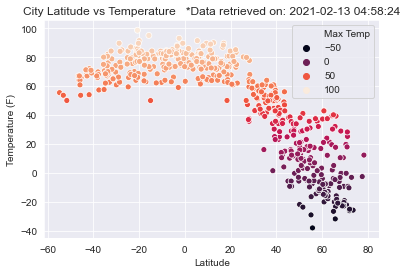

In [94]:

sns.scatterplot(x=cw_df['Lat'], y=cw_df['Max Temp'], hue= cw_df['Max Temp'], palette ="rocket")
sns.color_palette("rocket")
sns.set_style("darkgrid")
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')
plt.title(f"City Latitude vs Temperature   *Data retrieved on: {date}")
plt.show()

## Latitude vs. Humidity Plot

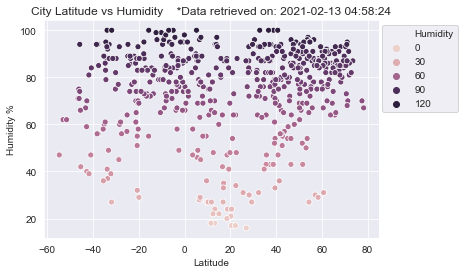

In [96]:
sns.scatterplot(x=cw_df['Lat'], y=cw_df['Humidity'], hue= cw_df['Humidity'])
sns.color_palette("magma")
sns.set_style("darkgrid")
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
plt.title(f"City Latitude vs Humidity    *Data retrieved on: {date}")
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.show()

## Latitude vs. Cloudiness Plot

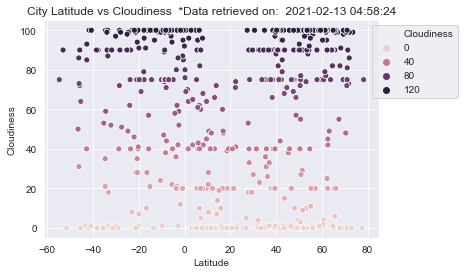

In [98]:
sns.scatterplot(x=cw_df['Lat'], y=cw_df['Cloudiness'], hue= cw_df['Cloudiness'])
sns.color_palette("magma")
sns.set_style("darkgrid")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title(f"City Latitude vs Cloudiness  *Data retrieved on:  {date}")
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.show()

## Latitude vs. Wind Speed Plot

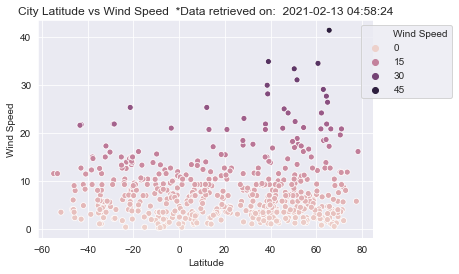

In [100]:
sns.scatterplot(x=cw_df['Lat'], y=cw_df['Wind Speed'], hue= cw_df['Wind Speed'])
sns.color_palette("magma")
sns.set_style("darkgrid")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title(f"City Latitude vs Wind Speed  *Data retrieved on:  {date}")
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.show()

## Linear Regression

In [136]:
n_cities=cw_df.loc[cw_df['Lat']> 0]
s_cities=cw_df.loc[cw_df['Lat']< 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

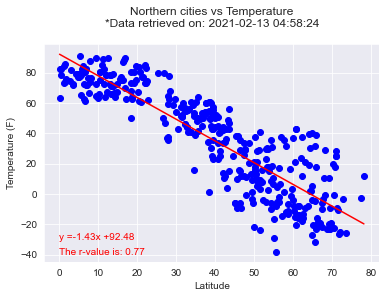

In [150]:
x=n_cities['Lat']
y=n_cities['Max Temp']

sns.scatterplot(x=x, y=y )

sns.set_style("darkgrid")
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')
plt.title(f"Northern cities vs Temperature\n*Data retrieved on: {date}\n")

(slope, intercept, r_value, p_value, std_err) = linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx)
y1=slope*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
rsqr = 'The r-value is: ' + str(round(r_value**2,2))
plt.annotate(line_eq, (0,-30), fontsize = 10, color= 'red')
plt.annotate(rsqr, (0,-40), fontsize = 10, color= 'red')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

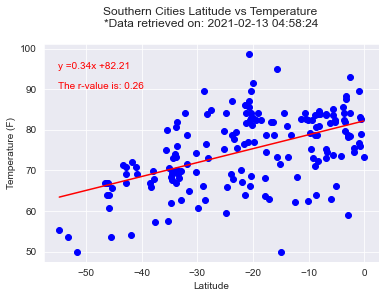

In [151]:
x=s_cities['Lat']
y=s_cities['Max Temp']

sns.scatterplot(x=x, y=y )

sns.set_style("darkgrid")
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')
plt.title(f"Southern Cities Latitude vs Temperature \n*Data retrieved on: {date}\n")

(slope, intercept, r_value, p_value, std_err) = linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx)
y1=slope*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
rsqr = 'The r-value is: ' + str(round(r_value**2,2))
plt.annotate(line_eq, (-55,95), fontsize = 10, color= 'red')
plt.annotate(rsqr, (-55,90), fontsize = 10, color= 'red')
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

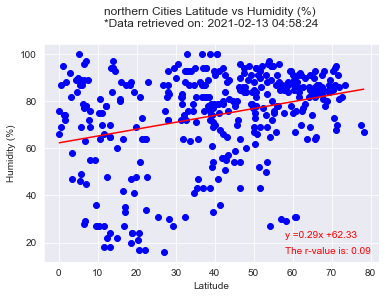

In [152]:
x=n_cities['Lat']
y=n_cities['Humidity']

sns.scatterplot(x=x, y=y )
sns.set_style("darkgrid")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title(f"northern Cities Latitude vs Humidity (%) \n*Data retrieved on: {date}\n")

(slope, intercept, r_value, p_value, std_err) = linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx)
y1=slope*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
rsqr = 'The r-value is: ' + str(round(r_value**2,2))
plt.annotate(line_eq, (58,22), fontsize = 10, color= 'red')
plt.annotate(rsqr, (58,15), fontsize = 10, color= 'red')
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

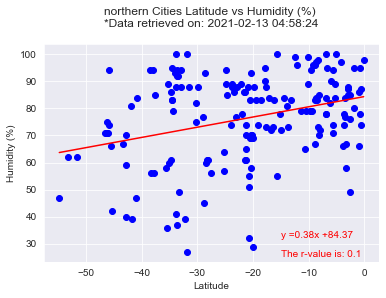

In [153]:
x=s_cities['Lat']
y=s_cities['Humidity']

sns.scatterplot(x=x, y=y )
sns.set_style("darkgrid")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title(f"northern Cities Latitude vs Humidity (%) \n*Data retrieved on: {date}\n")

(slope, intercept, r_value, p_value, std_err) = linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx)
y1=slope*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
rsqr = 'The r-value is: ' + str(round(r_value**2,2))
plt.annotate(line_eq, (-15,32), fontsize = 10, color= 'red')
plt.annotate(rsqr, (-15,25), fontsize = 10, color= 'red')
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

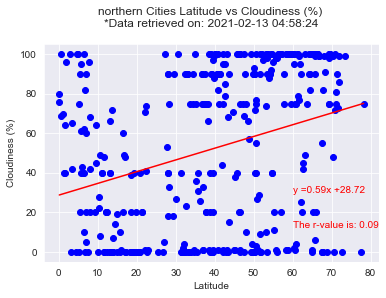

In [158]:
x=n_cities['Lat']
y=n_cities['Cloudiness']

sns.scatterplot(x=x, y=y )
sns.set_style("darkgrid")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title(f"northern Cities Latitude vs Cloudiness (%) \n*Data retrieved on: {date}\n")

(slope, intercept, r_value, p_value, std_err) = linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx)
y1=slope*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
rsqr = 'The r-value is: ' + str(round(r_value**2,2))
plt.annotate(line_eq, (60,30), fontsize = 10, color= 'red')
plt.annotate(rsqr, (60,12), fontsize = 10, color= 'red')
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

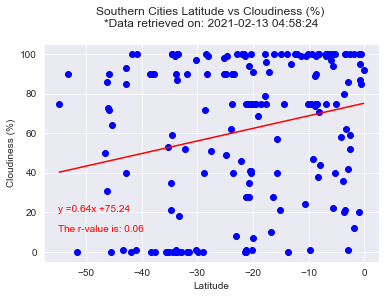

In [162]:
x=s_cities['Lat']
y=s_cities['Cloudiness']

sns.scatterplot(x=x, y=y )
sns.set_style("darkgrid")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title(f"Southern Cities Latitude vs Cloudiness (%) \n*Data retrieved on: {date}\n")

(slope, intercept, r_value, p_value, std_err) = linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx)
y1=slope*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
rsqr = 'The r-value is: ' + str(round(r_value**2,2))
plt.annotate(line_eq, (-55,20), fontsize = 10, color= 'red')
plt.annotate(rsqr, (-55,10), fontsize = 10, color= 'red')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression